# Part 1: 

## a: In your opinion, what were the most important turning points in the history of deep learning?
In my opinion, the history of deep learning has several key turning points. Early neural networks and perceptrons introduced the idea of learning from data, but training deep networks became practical only after backpropagation was developed. The 2006 paper on deep belief networks and the term "deep learning" marked a significant turning point, separating it from traditional neural networks.

The success of GPU-accelerated CNNs in 2012 (e.g., AlexNet) showed that deep networks could achieve state-of-the-art results in image recognition. Later, architectures like RNNs, LSTMs, and Transformers revolutionized natural language processing and sequence modeling. Today, large language models such as ChatGPT have transformed how we interact with AI. Personally, I found OpenAI Five impressive as well, since it showed how reinforcement learning could train agents to reach a superhuman win rate in complex environments.

## b: Explain the ADAM optimizer.
The ADAM (Adaptive Moment Estimation) is basically an optimizer that improves how neural networks learn. It is one of the most widely used optimizers in deep learning. ADAM optimizer is an advanced optimization algorithm that combines the benefits of two other popular optimizers: AdaGrad (moving averages of past gradients) and RMSProp (scaling updates based on squared gradients). It computes adaptive learning rates for each parameter by maintaining two moving averages: the first moment (mean) and the second moment (uncentered variance) of the gradients. This means it can train faster and more reliably on large or noisy datasets.

### c: Assume data input is a single 30x40 pixel image. First layer is a convolutional layer with 5 filters, with kernel size 3x2, step size (1,1) and padding='valid'. What are the output dimensions?


We use the standard convolution output size formula:

$$
H_{out} = \frac{H_{in} + 2 \cdot P_h - K_h}{S_h} + 1
$$

$$
W_{out} = \frac{W_{in} + 2 \cdot P_w - K_w}{S_w} + 1
$$

Where:

- $(H_{in}, W_{in})$ = input height and width  
- $(K_h, K_w)$ = kernel size  
- $(S_h, S_w)$ = stride  
- $(P_h, P_w)$ = padding (0 for `"valid"`)  

In [2]:
H_in, W_in = 30, 40  

# Conv layer parameters
kernel_h, kernel_w = 3, 2 # kernel size
stride_h, stride_w = 1, 1 # stride
pad_h, pad_w = 0, 0   # 'valid' means no padding
num_filters = 5 # number of filters

# Compute output dimensions from the formiula 
H_out = (H_in + 2*pad_h - kernel_h)//stride_h + 1
W_out = (W_in + 2*pad_w - kernel_w)//stride_w + 1

output_shape = (num_filters, H_out, W_out)
print("Output shape:", output_shape)

Output shape: (5, 28, 39)


> So the output is **5 feature maps of size 28×39**.

## d: Assuming ReLU activations and offsets, and that the last layer is softmax, how many parameters does this network have:  

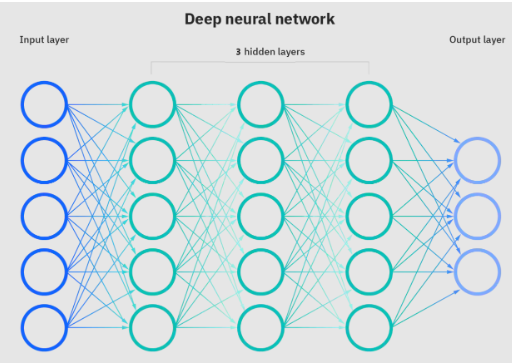
### Answer: 

From the image above we can see the nueral networks has 5 input nuerons, 3 hidden layers of 5 nuerons each, and 3 output neurons. 

### how many parameters does this network have:

* Weights between two fully connected layers of sizes $(n_{\text{in}})$ and $(n_{\text{out}}) = (n_{\text{in}} \times n_{\text{out}})$.
* Biases (offsets) for the target layer = $(n_{\text{out}})$.
* Total params for that connection = weights + biases.

Layers and parameter counts:

1. **Input (5) → Hidden1 (5):** $(5\times5 = 25)$ weights + (5) biases = **30** 
2. **Hidden1 (5) → Hidden2 (5):** $(5\times5 = 25)$ + (5) = **30**
3. **Hidden2 (5) → Hidden3 (5):** $(5\times5 = 25)$ + (5) = **30**
4. **Hidden3 (5) → Output (3):** $(5\times3 = 15)$ + (3) = **18**

**Total parameters = 30 + 30 + 30 + 18 = 108**


**Answer:** The network has **108 parameters** (weights + biases).


## e: What is the loss for this minibatch?
For a given minibatch, the targets are [1,4, 5, 8] and the network output is [0.1,4.4,0.2,10]. If the loss function is "torch.nn.HuberLoss(reduction='mean', delta=1.0)"

### Answer:
Using the definition of **Huber Loss** i will calculate the loss step by step:
The Huber loss for each element is defined as: 
$[
L(y, \hat{y}) =
\begin{cases}
0.5 \cdot (y - \hat{y})^2 & \text{if } |y - \hat{y}| < \delta \
\delta \cdot (|y - \hat{y}| - 0.5 \cdot \delta) & \text{otherwise}
\end{cases}
]$
with δ = 1.0. Since `reduction="mean"`, we average over the minibatch.

#### Step 1: Data

* Targets: `[1, 4, 5, 8]`
* Predictions: `[0.1, 4.4, 0.2, 10]`

#### Step 2: Errors
$[
e = y - \hat{y}
]$
* (1 - 0.1) = **0.9**
* (4 - 4.4) = **-0.4**
* (5 - 0.2) = **4.8**
* (8 - 10) = **-2.0**
Absolute errors: `[0.9, 0.4, 4.8, 2.0]`

#### Step 3: Apply Huber formula

* For 0.9 (< 1): $(0.5 \times 0.9^2 = 0.405)$
* For 0.4 (< 1): $(0.5 \times 0.4^2 = 0.08)$
* For 4.8 (≥ 1): $(1 \times (4.8 - 0.5) = 4.3)$
* For 2.0 (≥ 1): $(1 \times (2.0 - 0.5) = 1.5)$

#### Step 4: Mean reduction
$[
\text{loss} = \frac{0.405 + 0.08 + 4.3 + 1.5}{4} = \frac{6.285}{4} = 1.57125
]$
> **The Huber loss for this minibatch is ≈ 1.57**




In [3]:
import torch
import torch.nn as nn

# Targets and predictions
y_true = torch.tensor([1.0, 4.0, 5.0, 8.0])
y_pred = torch.tensor([0.1, 4.4, 0.2, 10.0])

#Create a criterion that uses a squared term to calculate the loss later
criterion = nn.HuberLoss(reduction='mean', delta=1.0)

# Compute loss
loss = criterion(y_pred, y_true)

print("Huber Loss:", loss.item())

Huber Loss: 1.571250081062317


# Part 2 Writing a PyTorch dataset 



In [25]:
import os
import pandas as pd
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np

### Answer
Here i will write a subclass that reads the ``insects.csv``, maps species names, loads images form the extracted ``insects.zip`` folder and returns the ``(image_tensor, lable)`` pairs. 

In [16]:

class InsectsDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.annotations = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

        # Encode species → integer
        self.species_to_idx = {species: idx 
                               for idx, species in enumerate(self.annotations["species"].unique())}
        self.idx_to_species = {v: k for k, v in self.species_to_idx.items()}

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.annotations.iloc[idx, 2])  # filename col
        image = Image.open(img_name).convert("RGB")
        species = self.annotations.iloc[idx, 1]  # species col
        label = self.species_to_idx[species]

        if self.transform:
            image = self.transform(image)

        return image, label

In [19]:

transform = transforms.Compose([
    transforms.Resize((128, 128)),   # ensure same size
    transforms.ToTensor()
])

dataset = InsectsDataset(
    csv_file="../data/Insects.csv",
    root_dir="../data/Insects",
    transform=transform
)

trainloader = torch.utils.data.DataLoader(dataset,
                                          batch_size=4,
                                          shuffle=True,
                                          num_workers=0)  # Windows fix


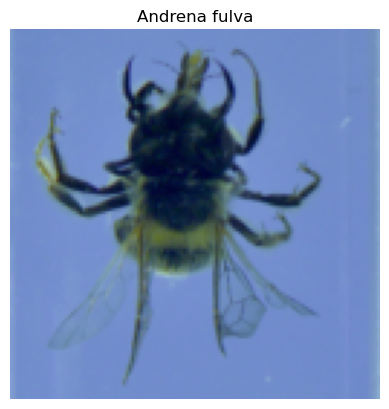

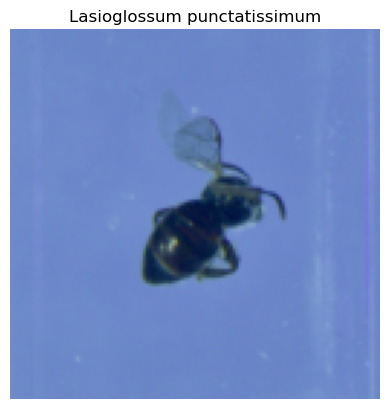

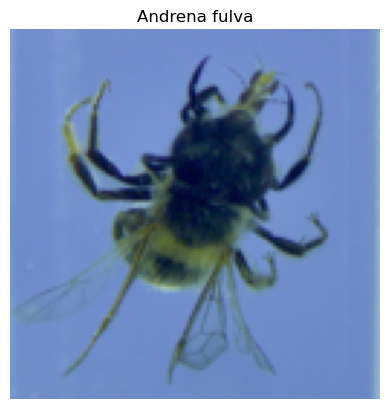

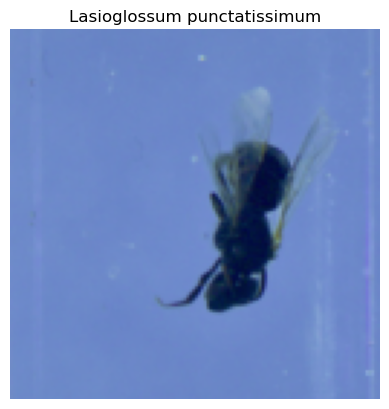

In [26]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

for image, label in zip(images, labels):
    plt.figure()
    plt.imshow(np.transpose(image.numpy(), (1, 2, 0)))
    plt.title(dataset.idx_to_species[label.item()])
    plt.axis("off")
    plt.show()
